# Transit Timing Example

In [5]:
include("NbodyGradient/src/NbodyGradient.jl")

Main.NbodyGradient

In [8]:
# Specify the initial conditions:

# Fill in system body parameters (m,P,t0,e,ϖ,i,Ω)
# Default values are zeros
# First, the star 
a = Elements(
        m = 0.82
)
# Next, the planets
b = Elements(
        m = 3.18e-4,
        P = 221.717,
        ecosϖ = 0.0069,
        I = pi/2,
)
c = Elements(
        m = 3e-6,
        P = 228.774,
        t0 = -228.774/6, # < We want mean anomaly to be +60 deg, so its
        ecosϖ  = 0.0054, #   transit should have about occurred 1/6 of an orbit 
        I = pi/2         #   prior to the initial time.
)

H = [3,1,1]
# Generate the initial conditions
ic = NbodyGradient.ElementsIC(0.0,H,a,b,c)

UndefVarError: UndefVarError: Elements not defined

In [28]:
# Now, pass the ICs to the State struct, which keeps track of the current state of the system
state = State(ic)
state.x # positions 

3×3 Array{Float64,2}:
 -2.16714e-6   -2.16714e-6   0.592581
  1.60063e-20  -4.1079e-17  -2.06854e-17
  0.000261403  -0.670871    -0.337818

In [29]:
# Set up the integrator.
t0 = 0.0 # Initial time
h = 1.0 # Time step
tmax = 9837.282 # Time to integrate to.

intr = Integrator(h, t0, tmax)

Integrator{Float64}(NbodyGradient.ah18!, 1.0, 0.0, 9837.282)

In [30]:
# If we want to calculate transit times,
# simply pass a TransitTiming structure to
# the integrator.

# Pass the initial conditions and tmax. 
# This allocates arrays to hold the transit times
# and derivatives.
tt = TransitTiming(tmax,ic);

In [31]:
# Now, run the integrator!
intr(state,tt)

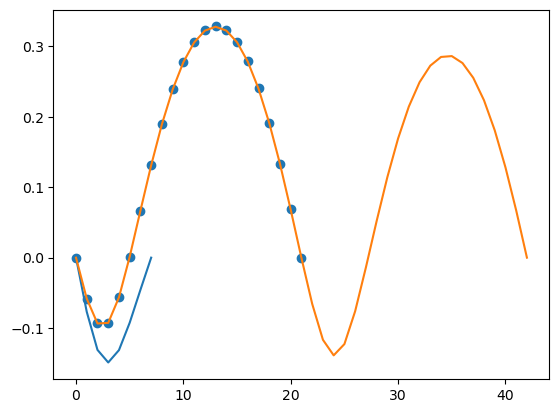

221.80266718923252
221.78389784838888
221.78392439692527


In [22]:
using PyPlot, Statistics
#pyplot()

# plot the transit timing variations
t1 = tt.tt[2,1:tt.count[2]]
nplot = [8,22,43]
for iplot=1:3
  pavg = mean(t1[2:nplot[iplot]] - t1[1:nplot[iplot]-1])
  it = collect(0:1:nplot[iplot]-1)
  ttv1 = t1[1:nplot[iplot]] .- it .* pavg .- t1[1]
  if iplot == 2
    scatter(it,ttv1)
  else
    plot(it,ttv1)
  end
  println(pavg)
end

In [6]:
mu_2 = 3.4272862326902173e-6
mu_3 = 3.581765952745082e-6

3.581765952745082e-6

In [12]:
(mu_3 - mu_2)/mu_2

0.04507348075611621